<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/1_Advanced_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input

Using TensorFlow backend.


In [0]:
from keras.optimizers import  Adam

In [0]:
input_tensor=Input(shape=(1,))

In [0]:
from keras.layers import Input,Dense
input_layer=Input(shape=(1,))
output_layer=Dense(1)
#output_tensor=output_layer(input_tensor)

In [0]:
output_tensor=Dense(1)(input_layer)
from keras.models import Model
model=Model(input_layer,output_tensor)

In [0]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [17]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


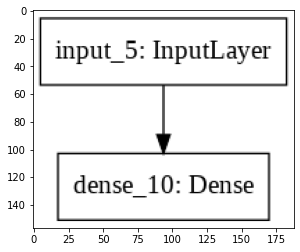

In [19]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model=model,to_file='model1.png')
data1=plt.imread('model1.png')
plt.imshow(data1)
plt.show()


# New Section Fit the model to the tournament basketball data

In [39]:
games_tourney=pd.read_csv('games_tourney.csv')
games_tourney.head(2)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1


In [37]:
model.fit(x=games_tourney.seed_diff,y=games_tourney.score_diff ,epochs=2,batch_size=128,validation_split=0.1,verbose=True)

Train on 3810 samples, validate on 424 samples
Epoch 1/2
3810/3810 [==============================] - 0s 9us/step - loss: 11.3374 - val_loss: 11.0744
Epoch 2/2
3810/3810 [==============================] - 0s 8us/step - loss: 11.2294 - val_loss: 10.9644


In [47]:
print(games_tourney[-804:].shape,games_tourney[:804].shape,games_tourney.shape)

(804, 9) (804, 9) (4234, 9)


In [55]:
# split test in 804 and the remaining for training
games_tourney_train=games_tourney[:-804]
games_tourney_test=games_tourney[:804]
print(games_tourney_train.shape,games_tourney_test.shape)

(3430, 9) (804, 9)


In [0]:
history=model.fit(games_tourney_train.seed_diff,games_tourney_train.score_diff,epochs=10,batch_size=128
    ,validation_split=0.1,verbose=True)

In [70]:
model.evaluate(games_tourney_test.seed_diff,games_tourney_test.score_diff)

804/804 [==============================] - 0s 27us/step


9.35733977360512

In [68]:
history_dict=history.history
for i in history_dict.keys():
  print(i)

val_loss
loss


# Define team lookup

Shared layers allow a model to use the same weight matrix for multiple steps. In this exercise, you will build a "team strength" layer that represents each team by a single number. You will use this number for both teams in the model. The model will learn a number for each team that works well both when the team is team_1 and when the team is team_2 in the input data.

The games_season DataFrame is available

In [117]:
games_season=pd.read_csv('games_season.csv')
games_season.head(2)

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1


In [118]:
#no of unique teams
import numpy as np
n_teams=np.unique(games_season.team_1).shape[0]
n_teams

10888

In [0]:
# Make embedding layer
from keras.layers import Embedding
team_lookup=Embedding(input_dim=n_teams,output_dim=1,input_length=1,name='Team-Strength')


In [0]:
from keras.layers import Input, Embedding, Flatten
from keras.models import Model
teamid_input_tensor=Input(shape=(1,))
strength_lookup=team_lookup(teamid_input_tensor)
strength_lookup_flat=Flatten()(strength_lookup)

In [0]:
# combine this in a re usable model  re usable model  re usable model
team_strength_model=Model(teamid_input_tensor,strength_lookup_flat,name='Team-Strength-Model')

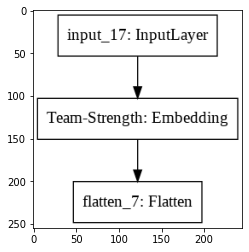

In [122]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model=team_strength_model,to_file='model2.png')
data1=plt.imread('model2.png')
plt.imshow(data1)
plt.show()

# Shared layers

In [0]:
# Make embedding layer
from keras.layers import Input, Embedding, Flatten
from keras.models import Model
team_lookup=Embedding(input_dim=n_teams,output_dim=1,input_length=1,name='Team-Strength')


teamid_input_tensor=Input(shape=(1,))
strength_lookup=team_lookup(teamid_input_tensor)
strength_lookup_flat=Flatten()(strength_lookup)

# combine this in a re usable model  re usable model  re usable model
team_strength_model=Model(teamid_input_tensor,strength_lookup_flat,name='Team-Strength-Model')


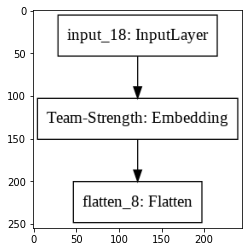

In [124]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model=team_strength_model,to_file='model2.png')
data1=plt.imread('model2.png')
plt.imshow(data1)
plt.show()

# Shared layers..starts..and then merge(+ x or -) them

In [0]:
# Shared layers
# Load the input layer from keras.layers
from keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,),name="Team-1-In")
# Separate input layer for team 2
team_in_2 = Input(shape=(1,),name="Team-2-In")

# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)
# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

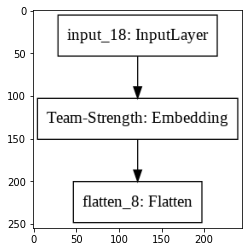

In [126]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model=team_strength_model,to_file='model3.png')
data1=plt.imread('model3.png')
plt.imshow(data1)
plt.show()

In [0]:
# Import the Subtract layer from keras
from keras.layers import Subtract

# Create a subtract layer using the inputs from the # previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

In [0]:
# Create the model
model = Model([team_in_1, team_in_2], score_diff)

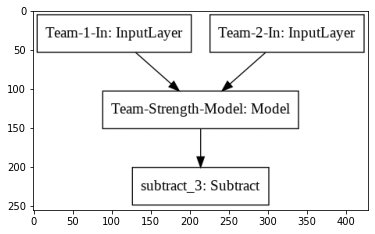

In [129]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model=model,to_file='model4.png')
data1=plt.imread('model4.png')
plt.imshow(data1)
plt.show()

In [0]:
# Compile the model
model.compile('adam', 'mean_absolute_error')

# New Section.Fit the data
# So far only dimensions have been used to make a model.Now we use the input data i.e Team1 and Team2 ids and the single out put i.e score_diff

In [131]:
games_season.head(2)

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1


In [132]:
input_1=games_season['team_1']
input_2=games_season['team_2']
# now fit the model
model.fit([input_1,input_2],games_season['score_diff']  ,epochs=2,batch_size=2048,validation_split=0.1,verbose=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 280960 samples, validate on 31218 samples
Epoch 1/2
280960/280960 [==============================] - 0s 1us/step - loss: 12.1206 - val_loss: 11.8385
Epoch 2/2
280960/280960 [==============================] - 0s 1us/step - loss: 12.0971 - val_loss: 11.8212


# We fit the data on the for the whole games data.Very interestingly we can now evaluate the results for the tournament data using the same model (trained on the all game data)

In [136]:
input_1=games_tourney['team_1']
input_2=games_tourney['team_2']

model.evaluate([input_1,input_2],games_tourney['score_diff'],verbose=False)

11.673165336666548